In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
# Flatten the label arrays
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Define selected class labels (airplane=0, automobile=1, bird=2, cat=3)
selected_classes = [0, 1, 2, 3,4,5,6,7]

# Create boolean masks to select only the desired classes
train_mask = np.isin(y_train, selected_classes)
test_mask = np.isin(y_test, selected_classes)

# Apply the masks to filter images and labels
X_train_filtered = X_train[train_mask]
y_train_filtered = y_train[train_mask]
X_test_filtered = X_test[test_mask]
y_test_filtered = y_test[test_mask]

# Normalize the image pixel values to [0, 1]
X_train_filtered = X_train_filtered / 255.0
X_test_filtered = X_test_filtered / 255.0

# One-hot encode the labels with num_classes=4 (since we have 8 classes)
y_train_oh = to_categorical(y_train_filtered, num_classes=8)
y_test_oh = to_categorical(y_test_filtered, num_classes=8)

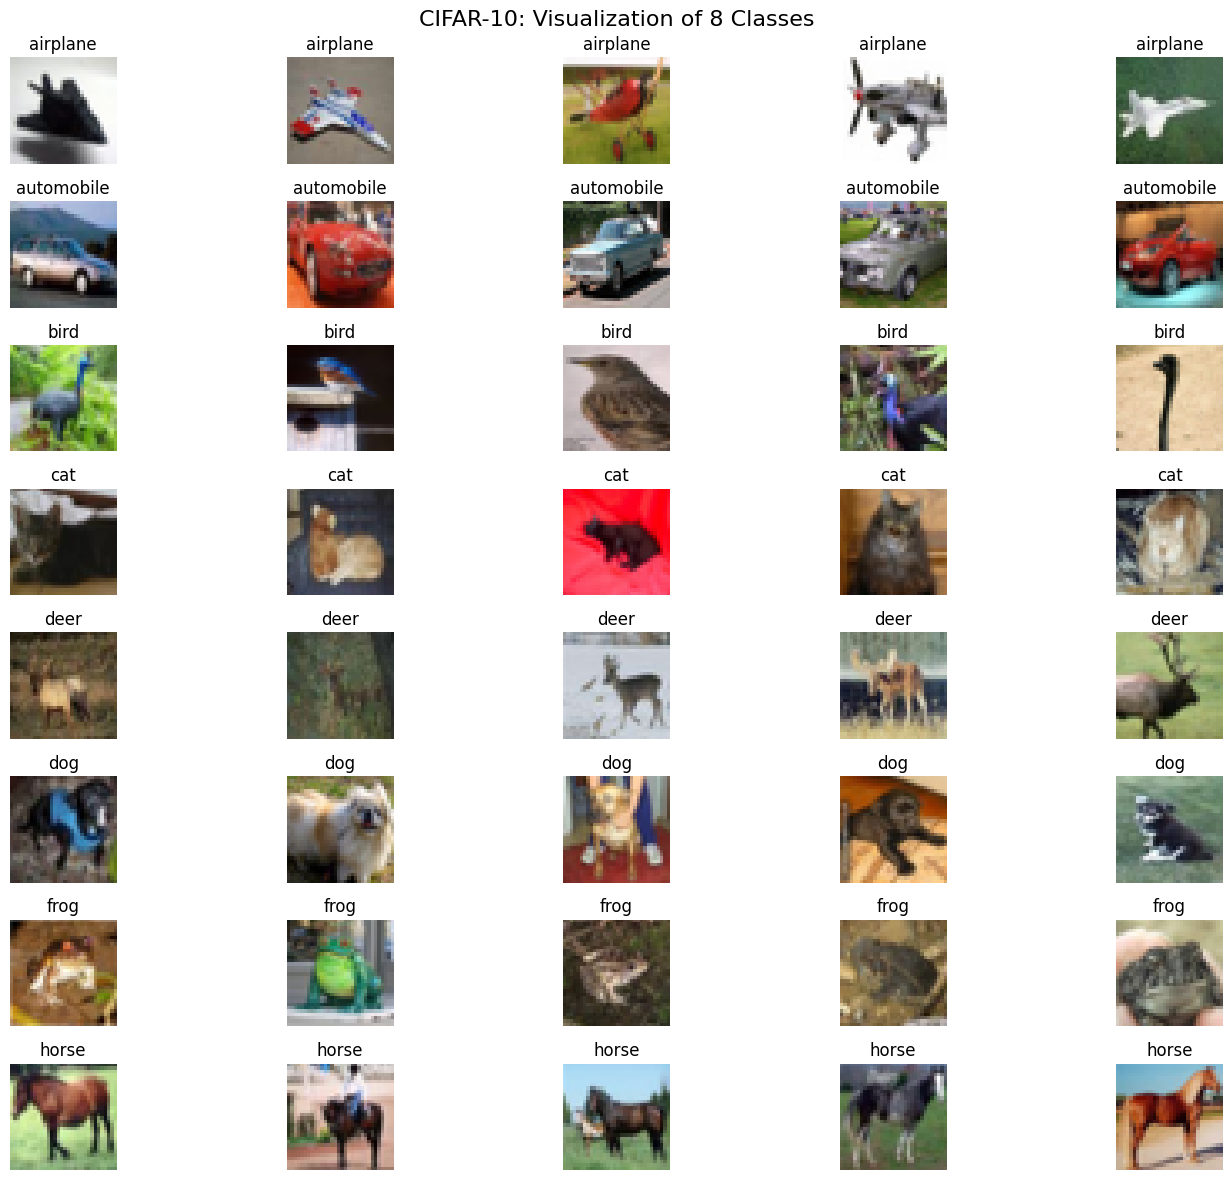

In [4]:
# Class names for 8 selected CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse']
selected_classes = [0, 1, 2, 3, 4, 5, 6, 7]  # Corresponding class indices

plt.figure(figsize=(15, 12))

# Plot 5 images for each of the 8 selected classes
for class_index, class_label in enumerate(selected_classes):
    # Get indices of training images for this class
    indices = np.where(y_train_filtered == class_label)[0]
    # Plot 5 sample images for the class
    for i in range(5):
        plt.subplot(8, 5, class_index * 5 + i + 1)
        plt.imshow(X_train_filtered[indices[i]])
        plt.title(class_names[class_index])
        plt.axis('off')

plt.suptitle("CIFAR-10: Visualization of 8 Classes", fontsize=16)
plt.tight_layout()
plt.show()

In [9]:
model= Sequential()
# flatten the image into 1D vector (3072)
model.add(Flatten(input_shape=(32,32,3)))
# first hidden layer
model.add(Dense(512,activation = 'relu'))
# output layer
model.add(Dense(8,activation ='softmax'))


In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,577,480 (6.02 MB)

 Trainable params: 1,577,480 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [12]:
model.fit(X_train_filtered, y_train_oh, epochs=3, batch_size=64)

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 28ms/step - accuracy: 0.3011 - loss: 2.0565
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.4113 - loss: 1.6088
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.4417 - loss: 1.5240


In [13]:
model.evaluate(X_test_filtered, y_test_oh)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4648 - loss: 1.4870


[1.4831163883209229, 0.46175000071525574]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


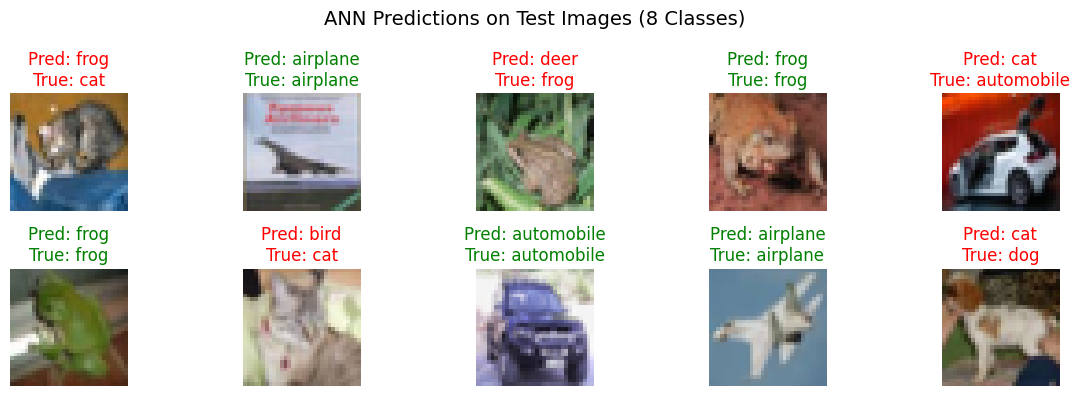

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on first 10 test images
pred_probs = model.predict(X_test_filtered[:10])
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = np.argmax(y_test_oh[:10], axis=1)

# Class labels for 8 selected classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse']

# Plot predictions with color-coded titles
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test_filtered[i])
    plt.title(f"Pred: {class_names[pred_classes[i]]}\nTrue: {class_names[true_classes[i]]}",
              color="green" if pred_classes[i] == true_classes[i] else "red")
    plt.axis('off')

plt.suptitle("ANN Predictions on Test Images (8 Classes)", fontsize=14)
plt.tight_layout()
plt.show()
